<h1 style="text-align:center;font-family:serif;font-size:3em;margin:30px">Binary Logistic Regression<h1>

In this notebook, we will develop a binary logistic regression model to classify 2 classes of points with 2 features.

**Import the necessary libraries**

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs

**Build the model**

In [167]:
def inisialiser(X):
    n=X.shape[1]
    W=np.random.randn(n,1)
    b=np.random.randn()
    return (W,b)


def model(X,W,b):
    a=X.dot(W)+b
    z=1/(1+np.exp(-a ))
    return z
    
def log_loss(A,y):
    m=len(y)
    return (-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))

def gradient(A,X,y):
    m=len(y)
    dW=(1/m)*X.T.dot(A-y)
    db=(1/m)*np.sum(A-y)
    return dW,db

def descente_gradien(W,b,dW,db,alpha):
    W=W-alpha*dW
    b=b-alpha*db
    return (W,b)

def predict(X_predict,W,b):
    z=model(X_predict,W,b)
    return z>=0.5

def apprentissage(X,y,alpha=0.1,n_iter=1000):
    loss=[]
    W,b=inisialiser(X)
    for i in range(n_iter):
        A=model(X,W,b)
        loss.append(log_loss(A,y))
        dW,db=gradient(A,X,y)
        W,b=descente_gradien(W,b,dW,db,alpha)
    plt.plot(loss)
    plt.title("Los_loss function")
    plt.xlabel("Number of iteration")
    plt.ylabel("log_loss")
    return W,b

def droite_decision(x1,W,b):
    return - (x1*W[0,0]+b)/W[1,0]

def accuracy(y_true,y_pred):
    return np.mean(y_true==y_pred)
    

**Load the data**

In [170]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)

In [172]:
y=y.reshape(y.shape[0],1)
print("Number of features : ",X.shape[1])

Number of features :  2


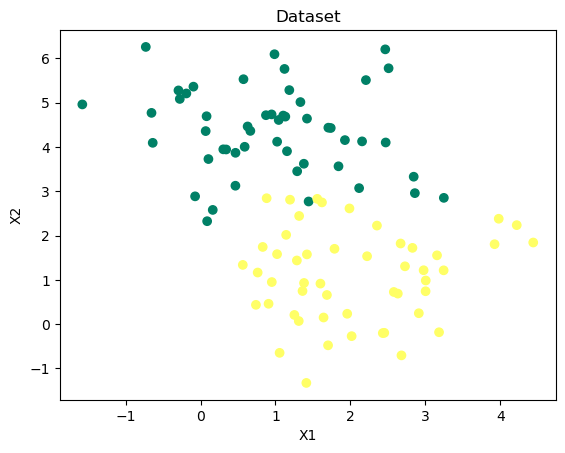

In [174]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset")
plt.show()

**Train the model**

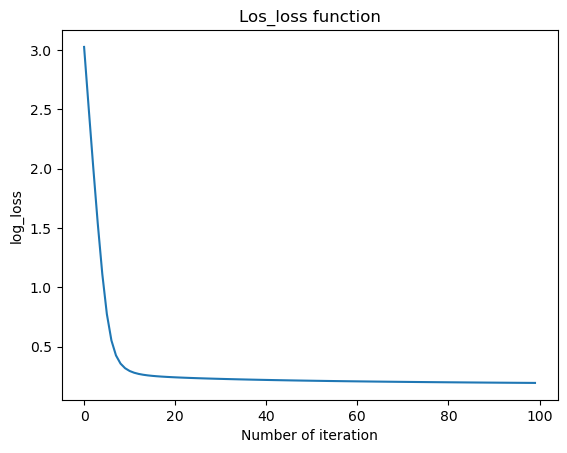

In [177]:
W=np.zeros((X.shape[1],1))
b=0
W,b=apprentissage(X,y,alpha=0.1,n_iter=100)

**Plot the decision boundary**

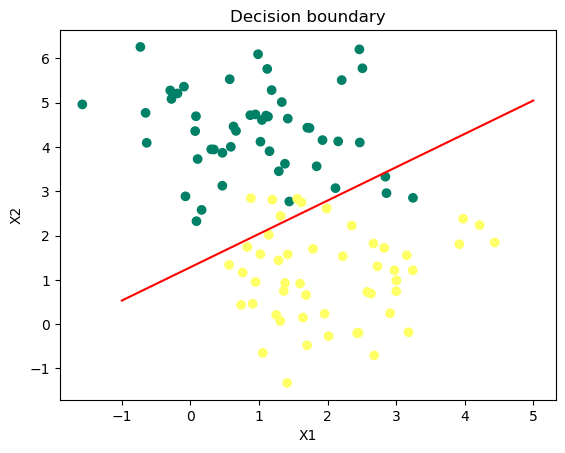

In [180]:
X1=np.linspace(-1, 5, 100)
X2=droite_decision(X1,W,b)
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.plot(X1,X2,c='r')
plt.title("Decision boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

**Evaluate the performance of the model**

In [183]:
y_predict=predict(X,W,b)
print("accuracy = ",accuracy(y,y_predict))

accuracy =  0.92


**Use the model for future predictions**

In [186]:
p=np.array([[-1,6]])
if predict(p,W,b)==False:
    print("green class")
else:
    print("yellow class")

green class


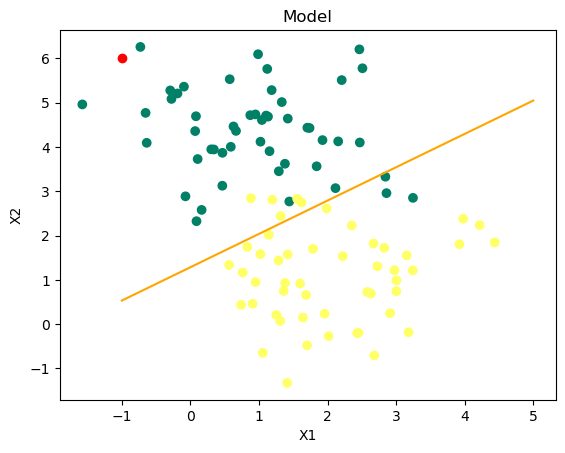

In [188]:
X1=np.linspace(-1, 5, 100)
X2=droite_decision(X1,W,b)
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.plot(X1,X2,color='orange')
plt.scatter(p[0][0],p[0][1],color="red")
plt.title("Model")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

**-------------------------------------------------------------------------------------------END---------------------------------------------------------------------------------------------**